# CA & US food_shelter relationship with Covid cases 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Initial Import

import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import seaborn as sns

%matplotlib inline

## Define & Read the  CSV File

In [21]:
#Define the csvpath 
csv_inflation = Path("Resources/food_shelter_CA_US.csv")

#Read in csvfile
inflation_db = pd.read_csv(csv_inflation,index_col='Reference period', infer_datetime_format=True, parse_dates=True)
inflation_db.head()


,Food_CA,Shelter_CA,Food_US,Shleter_US
Reference period,,,,
Jan-19,148.7,143.0,256.301,312.939
Feb-19,149.3,143.4,257.172,313.923
Mar-19,149.4,143.8,257.593,315.038
Apr-19,149.0,144.1,257.349,316.241
May-19,149.7,144.2,257.869,317.031


In [ ]:
csv_covid = Path("Resources/covid19_confirmed_cases_US_CA.csv")
covid_db = pd.read_csv(csv_covid, index_col='Months', infer_datetime_format=True, parse_dates=True)
covid_db

## Data Cleaning & Rearranging

In [23]:
#Rename the columns in inflation dataframe 
col_names = ["Months","Food_CA", "Shelter_CA", "Food_US", "Shelter_US"]

#Recreate the DataFrame
inflation_db = pd.read_csv (csv_inflation)

#add column names
inflation_db.columns = col_names
inflation_db.head()

,Months,Food_CA,Shelter_CA,Food_US,Shelter_US
0,Jan-19,148.7,143.0,256.301,312.939
1,Feb-19,149.3,143.4,257.172,313.923
2,Mar-19,149.4,143.8,257.593,315.038
3,Apr-19,149.0,144.1,257.349,316.241
4,May-19,149.7,144.2,257.869,317.031


In [27]:
#Rename the columns in covid_db Dataframe 
col_names = ["Months", "US_Covid", "CA_Covid"]

#Recreate the DataFrame
covid_db = pd.read_csv (csv_covid)

#add column names
covid_db.columns = col_names
covid_db

,Months,US_Covid,CA_Covid
0,Jan-20,41,12
1,Feb-20,402,239
2,Mar-20,1121455,58816
3,Apr-20,19952115,977839
4,May-20,45532271,2392456
5,Jun-20,64923564,3015280
6,Jul-20,111419452,3460239
7,Aug-20,166389385,3850908
8,Sep-20,199199386,4305850
9,Oct-20,251452617,6164002


In [28]:
# Join the datas for inflation analysis
effect_db = pd.merge( inflation_db,covid_db, on="Months")
effect_db.head()

,Months,Food_CA,Shelter_CA,Food_US,Shelter_US,US_Covid,CA_Covid
0,Jan-20,153.5,146.4,260.987,323.322,41,12
1,Feb-20,152.9,146.7,261.832,324.294,402,239
2,Mar-20,152.8,146.5,262.530,324.500,1121455,58816
3,Apr-20,154.0,146.0,266.322,324.515,19952115,977839
4,May-20,154.3,145.6,268.093,325.156,45532271,2392456


In [29]:
#Count nulls
effect_db.isnull().head()

,Months,Food_CA,Shelter_CA,Food_US,Shelter_US,US_Covid,CA_Covid
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [30]:
#pulling Food_CA, Shelter_CA and CA_Covid from the database
canada_df = effect_db[["Food_CA", "Shelter_CA", "CA_Covid"]]
canada_df.head()

,Food_CA,Shelter_CA,CA_Covid
0,153.5,146.4,12
1,152.9,146.7,239
2,152.8,146.5,58816
3,154.0,146.0,977839
4,154.3,145.6,2392456


In [31]:
#finding a correlation between covid cases and inflation rate of food and shelter in CA
correlation = canada_df.corr()
correlation

,Food_CA,Shelter_CA,CA_Covid
Food_CA,1.000000,0.915524,0.921020
Shelter_CA,0.915524,1.000000,0.974189
CA_Covid,0.921020,0.974189,1.000000


<AxesSubplot:>

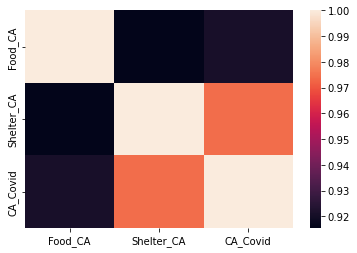

In [32]:
#plotting heatmap based on correlation
sns.heatmap(correlation)

In [33]:
##pulling Food_US, Shelter_US and US_Covid from the database
us_df = effect_db[["Food_US", "Shelter_US", "US_Covid"]]
us_df.head()

,Food_US,Shelter_US,US_Covid
0,260.987,323.322,41
1,261.832,324.294,402
2,262.530,324.500,1121455
3,266.322,324.515,19952115
4,268.093,325.156,45532271


In [34]:
#finding a correlation between covid cases and inflation rate of food and shelter in US
correlation = us_df.corr()
correlation

,Food_US,Shelter_US,US_Covid
Food_US,1.000000,0.972605,0.911797
Shelter_US,0.972605,1.000000,0.956462
US_Covid,0.911797,0.956462,1.000000


<AxesSubplot:>

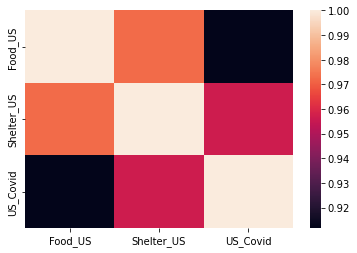

In [35]:
#plotting heatmap based on correlation
sns.heatmap(correlation)